## 👥 Team 2 – DEPI Project  
This EDA is developed by **Team 2** as part of the DEPI Program. Our goal is to build an **AI-powered predictive maintenance system** that uses IoT sensor data and machine learning to predict industrial equipment failures, reduce downtime, and improve operational efficiency.  

---

#### 📊 About Dataset  
We use the Factory Sensor Simulator dataset, a synthetic dataset created for predictive maintenance and anomaly detection in Industry 5.0.

This dataset contains from **500,000 simulated machines** in a futuristic smart factory.  

##### Key Features:  
- **30+ machine types:** CNC_Mill, Furnace, Robot_Arm, Laser_Cutter, etc.  
- **Core sensor data:** temperature, vibration, sound, power, oil/coolant levels  
- **Maintenance history & AI supervision fields**  
- **Machine-specific features:** Laser_Intensity, Hydraulic_Pressure_bar, and more  
- **Two target columns:**  
  - `Remaining_Useful_Life_days` → regression  
  - `Failure_Within_7_Days` → binary classification  


# Import libraries

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load data

In [172]:
df = pd.read_csv("../data/data.csv")
df.head()

,Machine_ID,Machine_Type,Installation_Year,Operational_Hours,Temperature_C,Vibration_mms,Sound_dB,Oil_Level_pct,Coolant_Level_pct,Power_Consumption_kW,...,Failure_History_Count,AI_Supervision,Error_Codes_Last_30_Days,Remaining_Useful_Life_days,Failure_Within_7_Days,Laser_Intensity,Hydraulic_Pressure_bar,Coolant_Flow_L_min,Heat_Index,AI_Override_Events
0,MC_000000,Mixer,2027,81769,73.43,12.78,83.72,36.76,68.74,84.95,...,5,True,3,162.0,False,NaN,NaN,NaN,NaN,2
1,MC_000001,Industrial_Chiller,2032,74966,58.32,14.99,77.04,100.00,62.13,154.61,...,2,True,4,147.0,False,NaN,NaN,40.92,NaN,2
2,MC_000002,Pick_and_Place,2003,94006,49.63,23.78,69.08,42.96,35.96,51.90,...,1,True,6,0.0,True,NaN,NaN,NaN,NaN,2
3,MC_000003,Vision_System,2007,76637,63.73,12.38,85.58,94.90,48.94,75.61,...,1,False,4,161.0,False,NaN,NaN,NaN,NaN,0
4,MC_000004,Shuttle_System,2016,20870,42.77,4.42,96.72,47.56,53.78,224.93,...,2,False,1,765.0,False,NaN,NaN,NaN,NaN,0


In [173]:
df.shape

(500000, 22)

In [174]:
df.columns

Index(['Machine_ID', 'Machine_Type', 'Installation_Year', 'Operational_Hours',
       'Temperature_C', 'Vibration_mms', 'Sound_dB', 'Oil_Level_pct',
       'Coolant_Level_pct', 'Power_Consumption_kW',
       'Last_Maintenance_Days_Ago', 'Maintenance_History_Count',
       'Failure_History_Count', 'AI_Supervision', 'Error_Codes_Last_30_Days',
       'Remaining_Useful_Life_days', 'Failure_Within_7_Days',
       'Laser_Intensity', 'Hydraulic_Pressure_bar', 'Coolant_Flow_L_min',
       'Heat_Index', 'AI_Override_Events'],
      dtype='object')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Machine_ID                  500000 non-null  object 
 1   Machine_Type                500000 non-null  object 
 2   Installation_Year           500000 non-null  int64  
 3   Operational_Hours           500000 non-null  int64  
 4   Temperature_C               500000 non-null  float64
 5   Vibration_mms               500000 non-null  float64
 6   Sound_dB                    500000 non-null  float64
 7   Oil_Level_pct               500000 non-null  float64
 8   Coolant_Level_pct           500000 non-null  float64
 9   Power_Consumption_kW        500000 non-null  float64
 10  Last_Maintenance_Days_Ago   500000 non-null  int64  
 11  Maintenance_History_Count   500000 non-null  int64  
 12  Failure_History_Count       500000 non-null  int64  
 13  AI_Supervision

In [176]:
df.describe(include='all')

,Machine_ID,Machine_Type,Installation_Year,Operational_Hours,Temperature_C,Vibration_mms,Sound_dB,Oil_Level_pct,Coolant_Level_pct,Power_Consumption_kW,...,Failure_History_Count,AI_Supervision,Error_Codes_Last_30_Days,Remaining_Useful_Life_days,Failure_Within_7_Days,Laser_Intensity,Hydraulic_Pressure_bar,Coolant_Flow_L_min,Heat_Index,AI_Override_Events
count,500000,500000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000,500000.000000,500000.000000,500000,15156.000000,30340.000000,45624.000000,45214.000000,500000.000000
unique,500000,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,MC_000000,AGV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,1,15409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,349585,NaN,NaN,469968,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2019.962360,50012.424764,59.997682,9.99114,75.003477,69.456568,64.114159,149.922161,...,2.000588,NaN,3.000840,452.422338,NaN,74.995513,119.917514,39.984794,499.760966,0.602098
std,NaN,NaN,11.829812,28861.849078,14.986973,4.99953,9.990791,18.847444,23.152998,79.955937,...,1.413087,NaN,1.730541,288.971269,NaN,10.035133,15.017048,9.989653,50.012057,1.203647
min,NaN,NaN,2000.000000,0.000000,-15.730000,-17.82000,23.650000,0.000000,0.000000,-222.740000,...,0.000000,NaN,0.000000,0.000000,NaN,34.970000,52.680000,-0.160000,296.440000,0.000000
25%,NaN,NaN,2010.000000,25055.000000,49.890000,6.62000,68.270000,56.540000,48.130000,96.090000,...,1.000000,NaN,2.000000,200.000000,NaN,68.250000,109.820000,33.200000,465.940000,0.000000
50%,NaN,NaN,2020.000000,49973.000000,60.000000,10.00000,75.000000,70.030000,65.010000,149.950000,...,2.000000,NaN,3.000000,451.000000,NaN,74.950000,119.860000,40.030000,499.770000,0.000000
75%,NaN,NaN,2030.000000,74995.000000,70.050000,13.36000,81.730000,83.540000,81.840000,203.900000,...,3.000000,NaN,4.000000,700.000000,NaN,81.682500,130.072500,46.750000,533.307500,1.000000


In [177]:
df.isnull().sum().sort_values(ascending=False)

Laser_Intensity               484844
Hydraulic_Pressure_bar        469660
Heat_Index                    454786
Coolant_Flow_L_min            454376
Machine_ID                         0
Machine_Type                       0
Vibration_mms                      0
Temperature_C                      0
Operational_Hours                  0
Installation_Year                  0
Sound_dB                           0
Oil_Level_pct                      0
Coolant_Level_pct                  0
Power_Consumption_kW               0
AI_Supervision                     0
Failure_History_Count              0
Maintenance_History_Count          0
Last_Maintenance_Days_Ago          0
Failure_Within_7_Days              0
Remaining_Useful_Life_days         0
Error_Codes_Last_30_Days           0
AI_Override_Events                 0
dtype: int64

In [178]:
# The following features contain a large proportion of missing values:
#   - Laser_Intensity
#   - Hydraulic_Pressure_bar
#   - Heat_Index
#   - Coolant_Flow_L_min
#
# Baseline comparison of handling strategies:
#   • Mean imputation   → Balanced Accuracy = 0.8190
#   • Median imputation → Balanced Accuracy = 0.8197
#   • Feature removal   → Balanced Accuracy = 0.8215
#
# Based on these results, feature removal yields slightly better performance.

df.drop(
    columns=["Laser_Intensity",
             "Hydraulic_Pressure_bar",
             "Heat_Index",
             "Coolant_Flow_L_min"],
    inplace=True,
    errors='ignore'
)


In [179]:
df.duplicated().sum()

np.int64(0)

In [180]:
df.isnull().sum().sort_values(ascending=False)

Machine_ID                    0
Machine_Type                  0
Installation_Year             0
Operational_Hours             0
Temperature_C                 0
Vibration_mms                 0
Sound_dB                      0
Oil_Level_pct                 0
Coolant_Level_pct             0
Power_Consumption_kW          0
Last_Maintenance_Days_Ago     0
Maintenance_History_Count     0
Failure_History_Count         0
AI_Supervision                0
Error_Codes_Last_30_Days      0
Remaining_Useful_Life_days    0
Failure_Within_7_Days         0
AI_Override_Events            0
dtype: int64

In [181]:
df.nunique()

Machine_ID                    500000
Machine_Type                      33
Installation_Year                 41
Operational_Hours              99328
Temperature_C                   9878
Vibration_mms                   3604
Sound_dB                        6806
Oil_Level_pct                   9275
Coolant_Level_pct               9984
Power_Consumption_kW           43440
Last_Maintenance_Days_Ago        366
Maintenance_History_Count         19
Failure_History_Count             13
AI_Supervision                     2
Error_Codes_Last_30_Days          14
Remaining_Useful_Life_days      1106
Failure_Within_7_Days              2
AI_Override_Events                12
dtype: int64

# Visualization

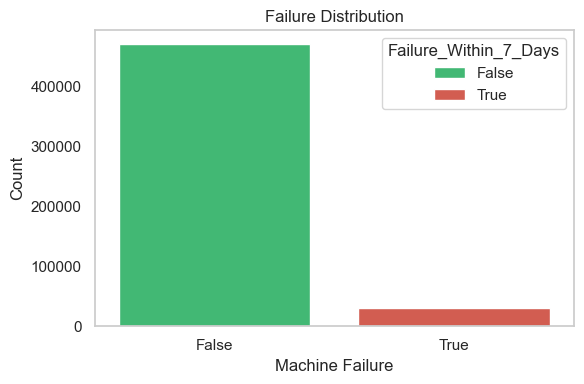

In [182]:
plt.figure(figsize=(6,4))
sns.countplot(x='Failure_Within_7_Days', data=df, hue='Failure_Within_7_Days',palette=['#2ecc71', '#e74c3c'])
plt.title('Failure Distribution')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.grid(False)
plt.tight_layout()
plt.show()

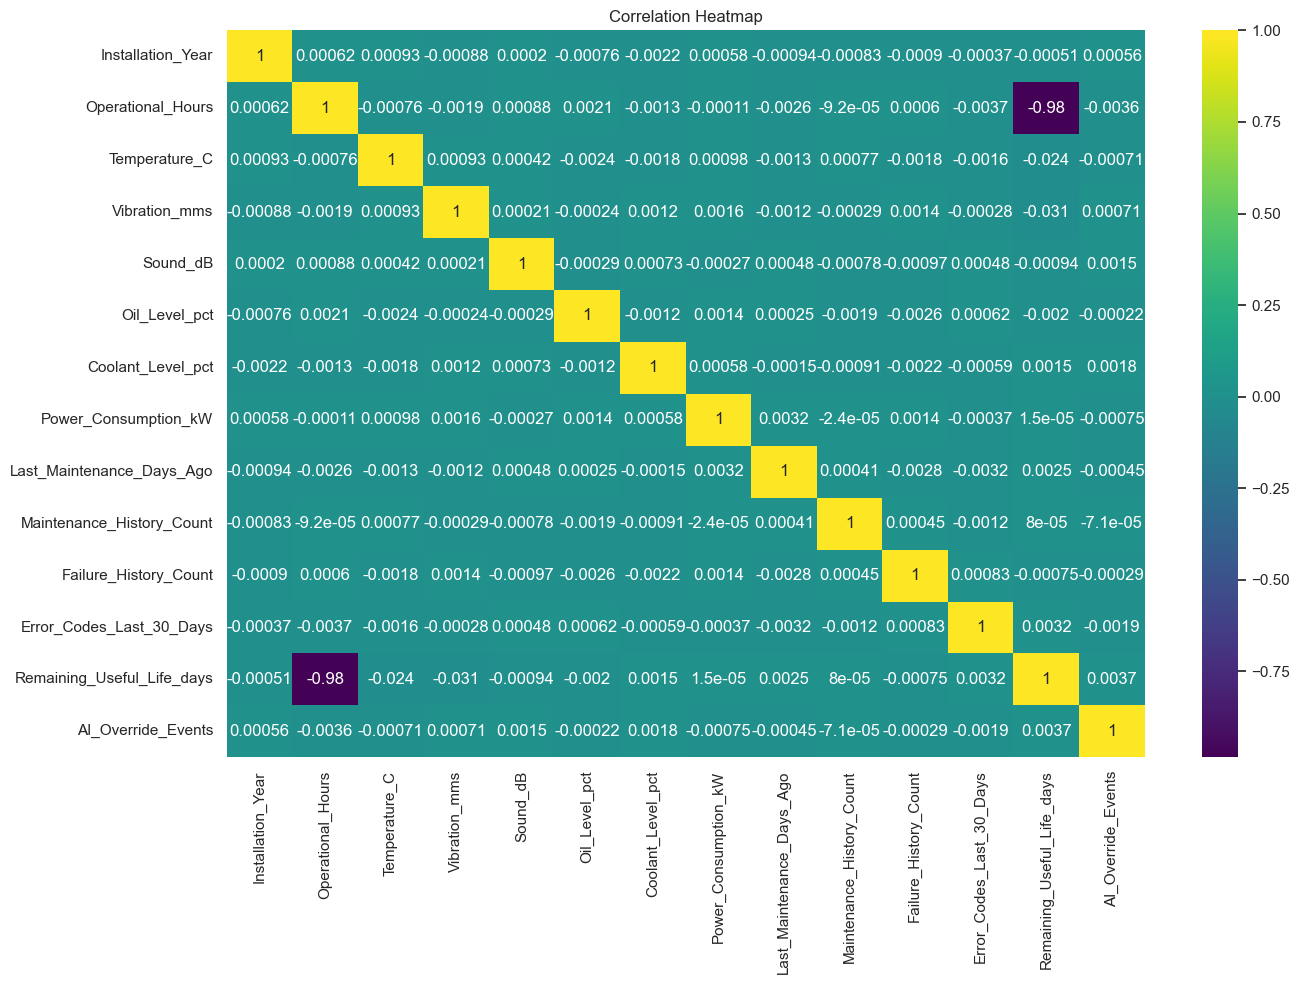

In [183]:
num_features = df.select_dtypes(include=[np.number])
if "Failure_Within_7_Days" in num_features.columns:
    num_features = num_features.drop(columns=["Failure_Within_7_Days"])
plt.figure(figsize=(14, 10))
sns.heatmap(num_features.corr(), cmap="viridis", center=0, annot=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


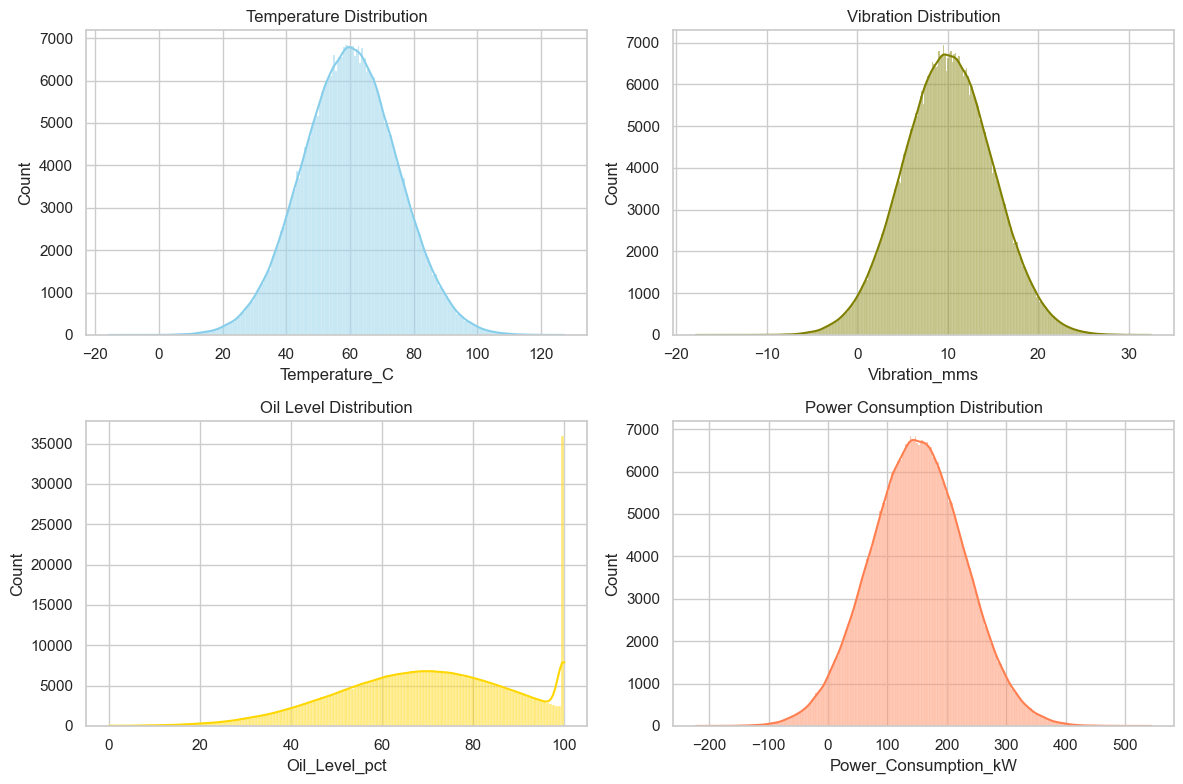

In [184]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
sns.histplot(df['Temperature_C'], ax=ax[0,0], kde=True, color='skyblue')
ax[0,0].set_title('Temperature Distribution')

sns.histplot(df['Vibration_mms'], ax=ax[0,1], kde=True, color='olive')
ax[0,1].set_title('Vibration Distribution')

sns.histplot(df['Oil_Level_pct'], ax=ax[1,0], kde=True, color='gold')
ax[1,0].set_title('Oil Level Distribution')

sns.histplot(df['Power_Consumption_kW'], ax=ax[1,1], kde=True, color='coral')
ax[1,1].set_title('Power Consumption Distribution')

plt.tight_layout()
plt.show()

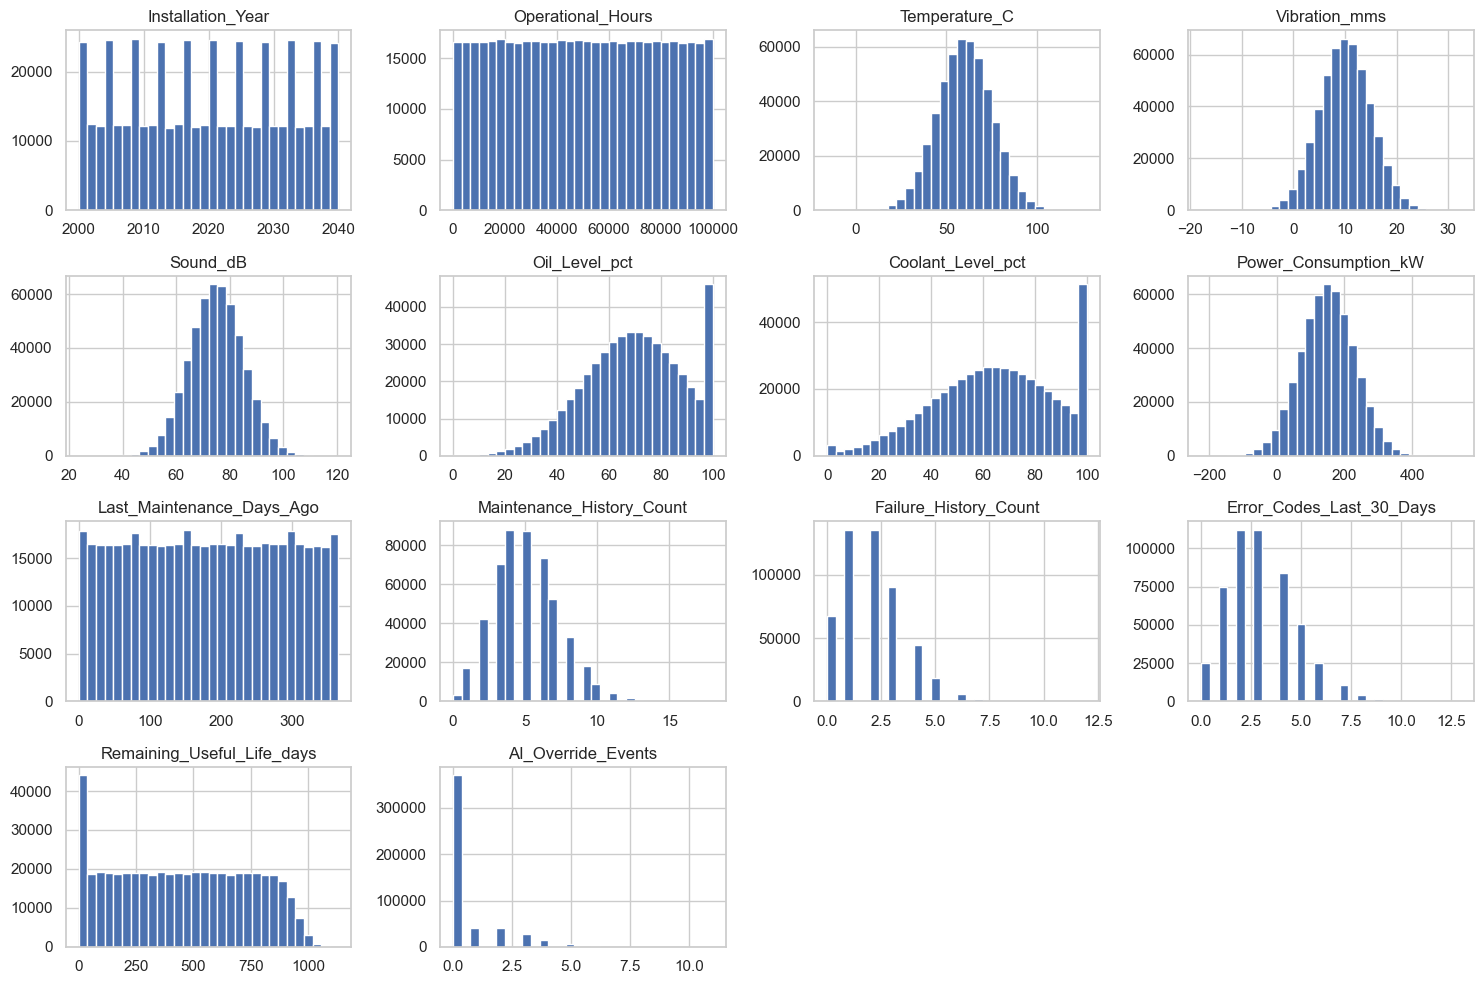

In [185]:
# Plot histograms of numerical features
numerical = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

### Removing **outliers**

In [186]:
def outliers_detection_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df < lower_bound) | (df > upper_bound)]
    return outliers

In [187]:
outliers_temp = outliers_detection_iqr(df['Temperature_C'])
print(f'Number of outliers in Temperature_C: {len(outliers_temp)}')

Number of outliers in Temperature_C: 3569


In [188]:
outliers_vib = outliers_detection_iqr(df['Vibration_mms'])
print(f'Number of outliers in Vibration_mms: {len(outliers_vib)}')

Number of outliers in Vibration_mms: 3449


In [189]:
outliers_sound = outliers_detection_iqr(df['Sound_dB'])
print(f'Number of outliers in Sound_dB: {len(outliers_sound)}')

Number of outliers in Sound_dB: 3582


In [190]:
outliers_oil = outliers_detection_iqr(df['Oil_Level_pct'])
print(f'Number of outliers in Oil_Level_pct: {len(outliers_oil)}')

Number of outliers in Oil_Level_pct: 1708


In [191]:
outliers_cool = outliers_detection_iqr(df['Coolant_Level_pct'])
print(f'Number of outliers in Coolant_Level_pct: {len(outliers_cool)}')

Number of outliers in Coolant_Level_pct: 0


In [192]:
outliers_power = outliers_detection_iqr(df['Power_Consumption_kW'])
print(f'Number of outliers in Power_Consumption_kW: {len(outliers_power)}')

Number of outliers in Power_Consumption_kW: 3513


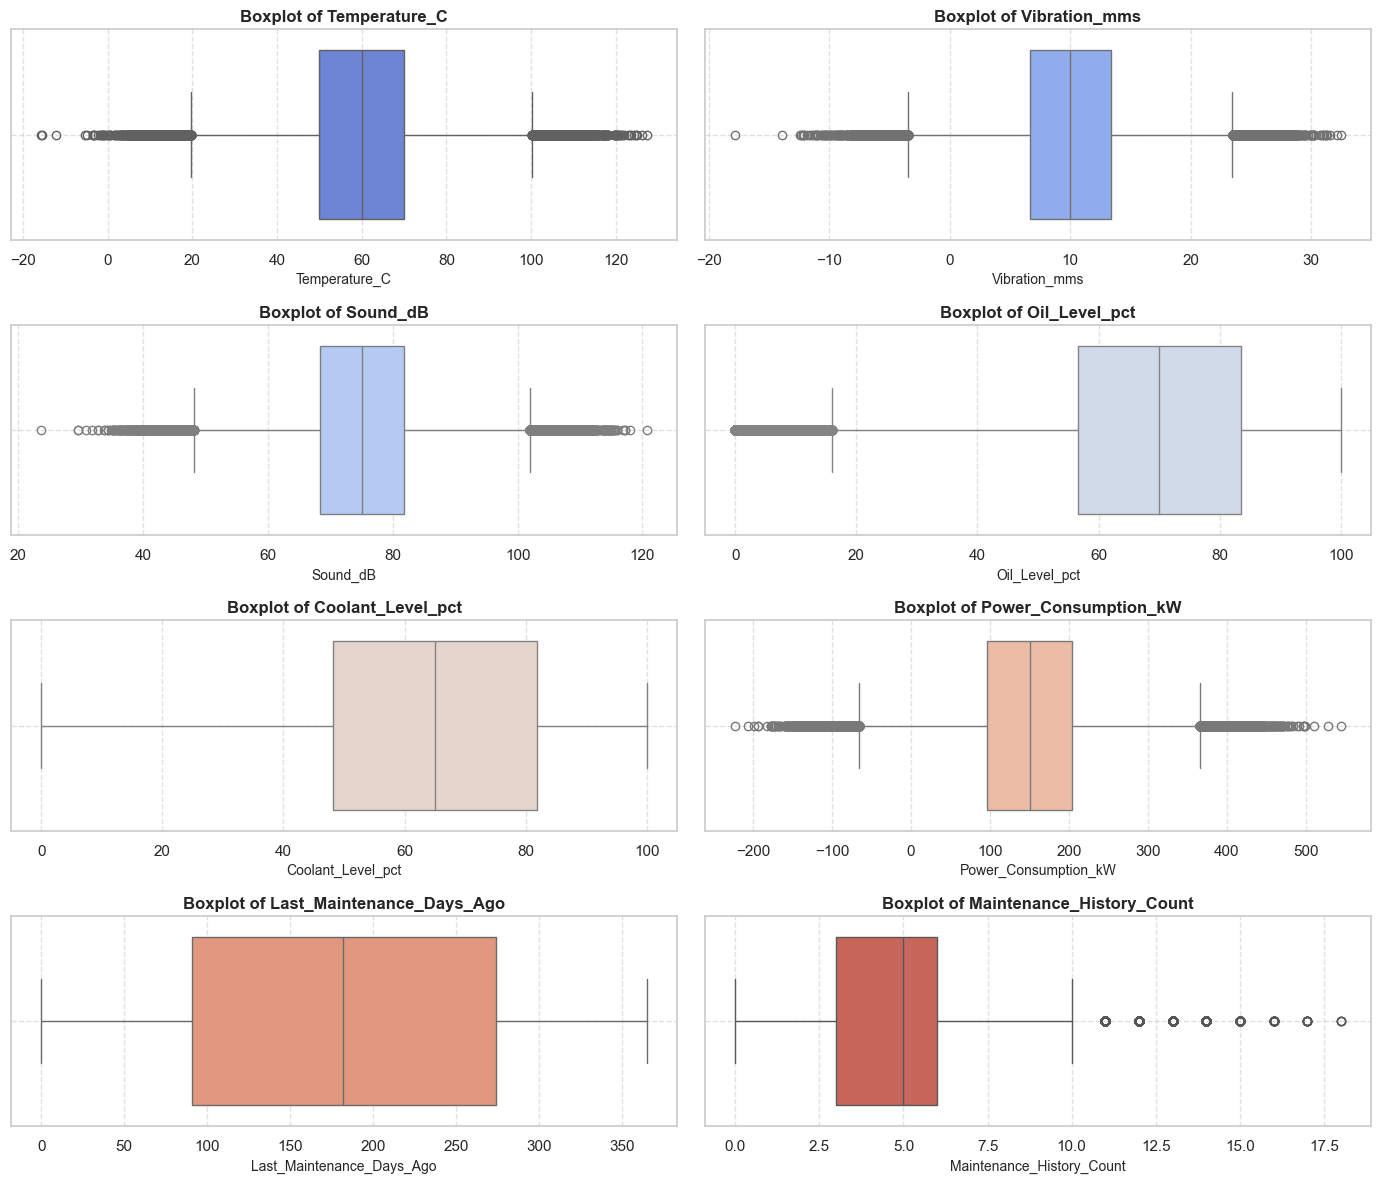

In [193]:
cols_to_check = [
    'Temperature_C', 'Vibration_mms', 'Sound_dB',
    'Oil_Level_pct', 'Coolant_Level_pct', 'Power_Consumption_kW',
    'Last_Maintenance_Days_Ago', 'Maintenance_History_Count'
]

# Create subplots
n_cols = 2
n_rows = (len(cols_to_check) + 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 3*n_rows))

# Flatten axes for easy indexing
axes = axes.flatten()

# Custom color palette
palette = sns.color_palette("coolwarm", len(cols_to_check))

# Plot each feature
for i, col in enumerate(cols_to_check):
    sns.boxplot(x=df[col], ax=axes[i], color=palette[i])
    axes[i].set_title(f"Boxplot of {col}", fontsize=12, weight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].grid(True, linestyle="--", alpha=0.6)

# Remove empty subplot if odd number of features
if len(cols_to_check) % n_cols != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [194]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_df

In [195]:
numeric_cols = [ 'Vibration_mms', 'Sound_dB', 'Oil_Level_pct', 'Coolant_Level_pct', 'Power_Consumption_kW','Temperature_C']

df_clean = df.copy()
for col in numeric_cols:
    df_clean = remove_outliers_iqr(df_clean, col)

print(f'Shape after removing outliers in multiple columns: {df_clean.shape}')

Shape after removing outliers in multiple columns: (484359, 18)


# Soon => **Feature engineering **

In [ ]:
#
#   Not Completed Code
#
from scipy.fftpack import fft

sensor_cols = [
    "Operational_Hours",
    "Temperature_C",
    "Vibration_mms",
    "Sound_dB",
    "Oil_Level_pct",
    "Coolant_Level_pct",
    "Power_Consumption_kW"
]

window_size = 10

for col in sensor_cols:
    if col in df.columns:
        df[f"{col}_ma"] = df[col].rolling(window_size, min_periods=1).mean()
        df[f"{col}_std"] = df[col].rolling(window_size, min_periods=1).std()
        df[f"{col}_min"] = df[col].rolling(window_size, min_periods=1).min()
        df[f"{col}_max"] = df[col].rolling(window_size, min_periods=1).max()


def compute_fft_features(signal):
    signal = signal.dropna().values
    if len(signal) == 0:
        return pd.Series([0, 0, 0], index=["fft_mean", "fft_peak", "fft_energy"])

    fft_vals = np.abs(fft(signal))
    return
